In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('..\dataset\Life_Expectancy_Data_Transformed_Final.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_31260\81295919.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('..\dataset\Life_Expectancy_Data_Transformed_Final.csv')


In [3]:
df.head()

,国家,年份,预期寿命,成人死亡率,婴儿死亡数,酒精消费,五岁以下死亡数,乙肝疫苗接种率,麻疹病例数,BMI指数,脊髓灰质炎疫苗接种率,白喉疫苗接种率,HIV/AIDS死亡率,GDP人均,人口数量(百万),10-19岁消瘦率,5-9岁消瘦率,受教育年限,发展状态_数值
0,Afghanistan,2015.0,63.4,227.735,53.2,0.00,70.4,65.0,42.0,23.3,67.0,65.0,0.03,556.0,34.41,15.6,15.85,3.6,0.0
1,Afghanistan,2014.0,63.0,231.978,55.2,0.01,73.6,62.0,44.0,23.2,62.0,62.0,0.03,565.0,33.37,15.6,15.85,3.5,0.0
2,Afghanistan,2013.0,62.5,236.221,57.3,0.01,76.9,64.0,38.0,23.0,64.0,64.0,0.03,569.0,32.27,15.6,15.85,3.5,0.0
3,Afghanistan,2012.0,62.1,240.464,59.5,0.01,80.3,67.0,33.0,22.9,67.0,67.0,0.03,558.0,31.16,15.6,15.85,3.4,0.0
4,Afghanistan,2011.0,61.6,245.300,61.8,0.01,84.0,68.0,31.0,22.8,68.0,68.0,0.02,512.0,30.12,15.6,15.85,3.3,0.0


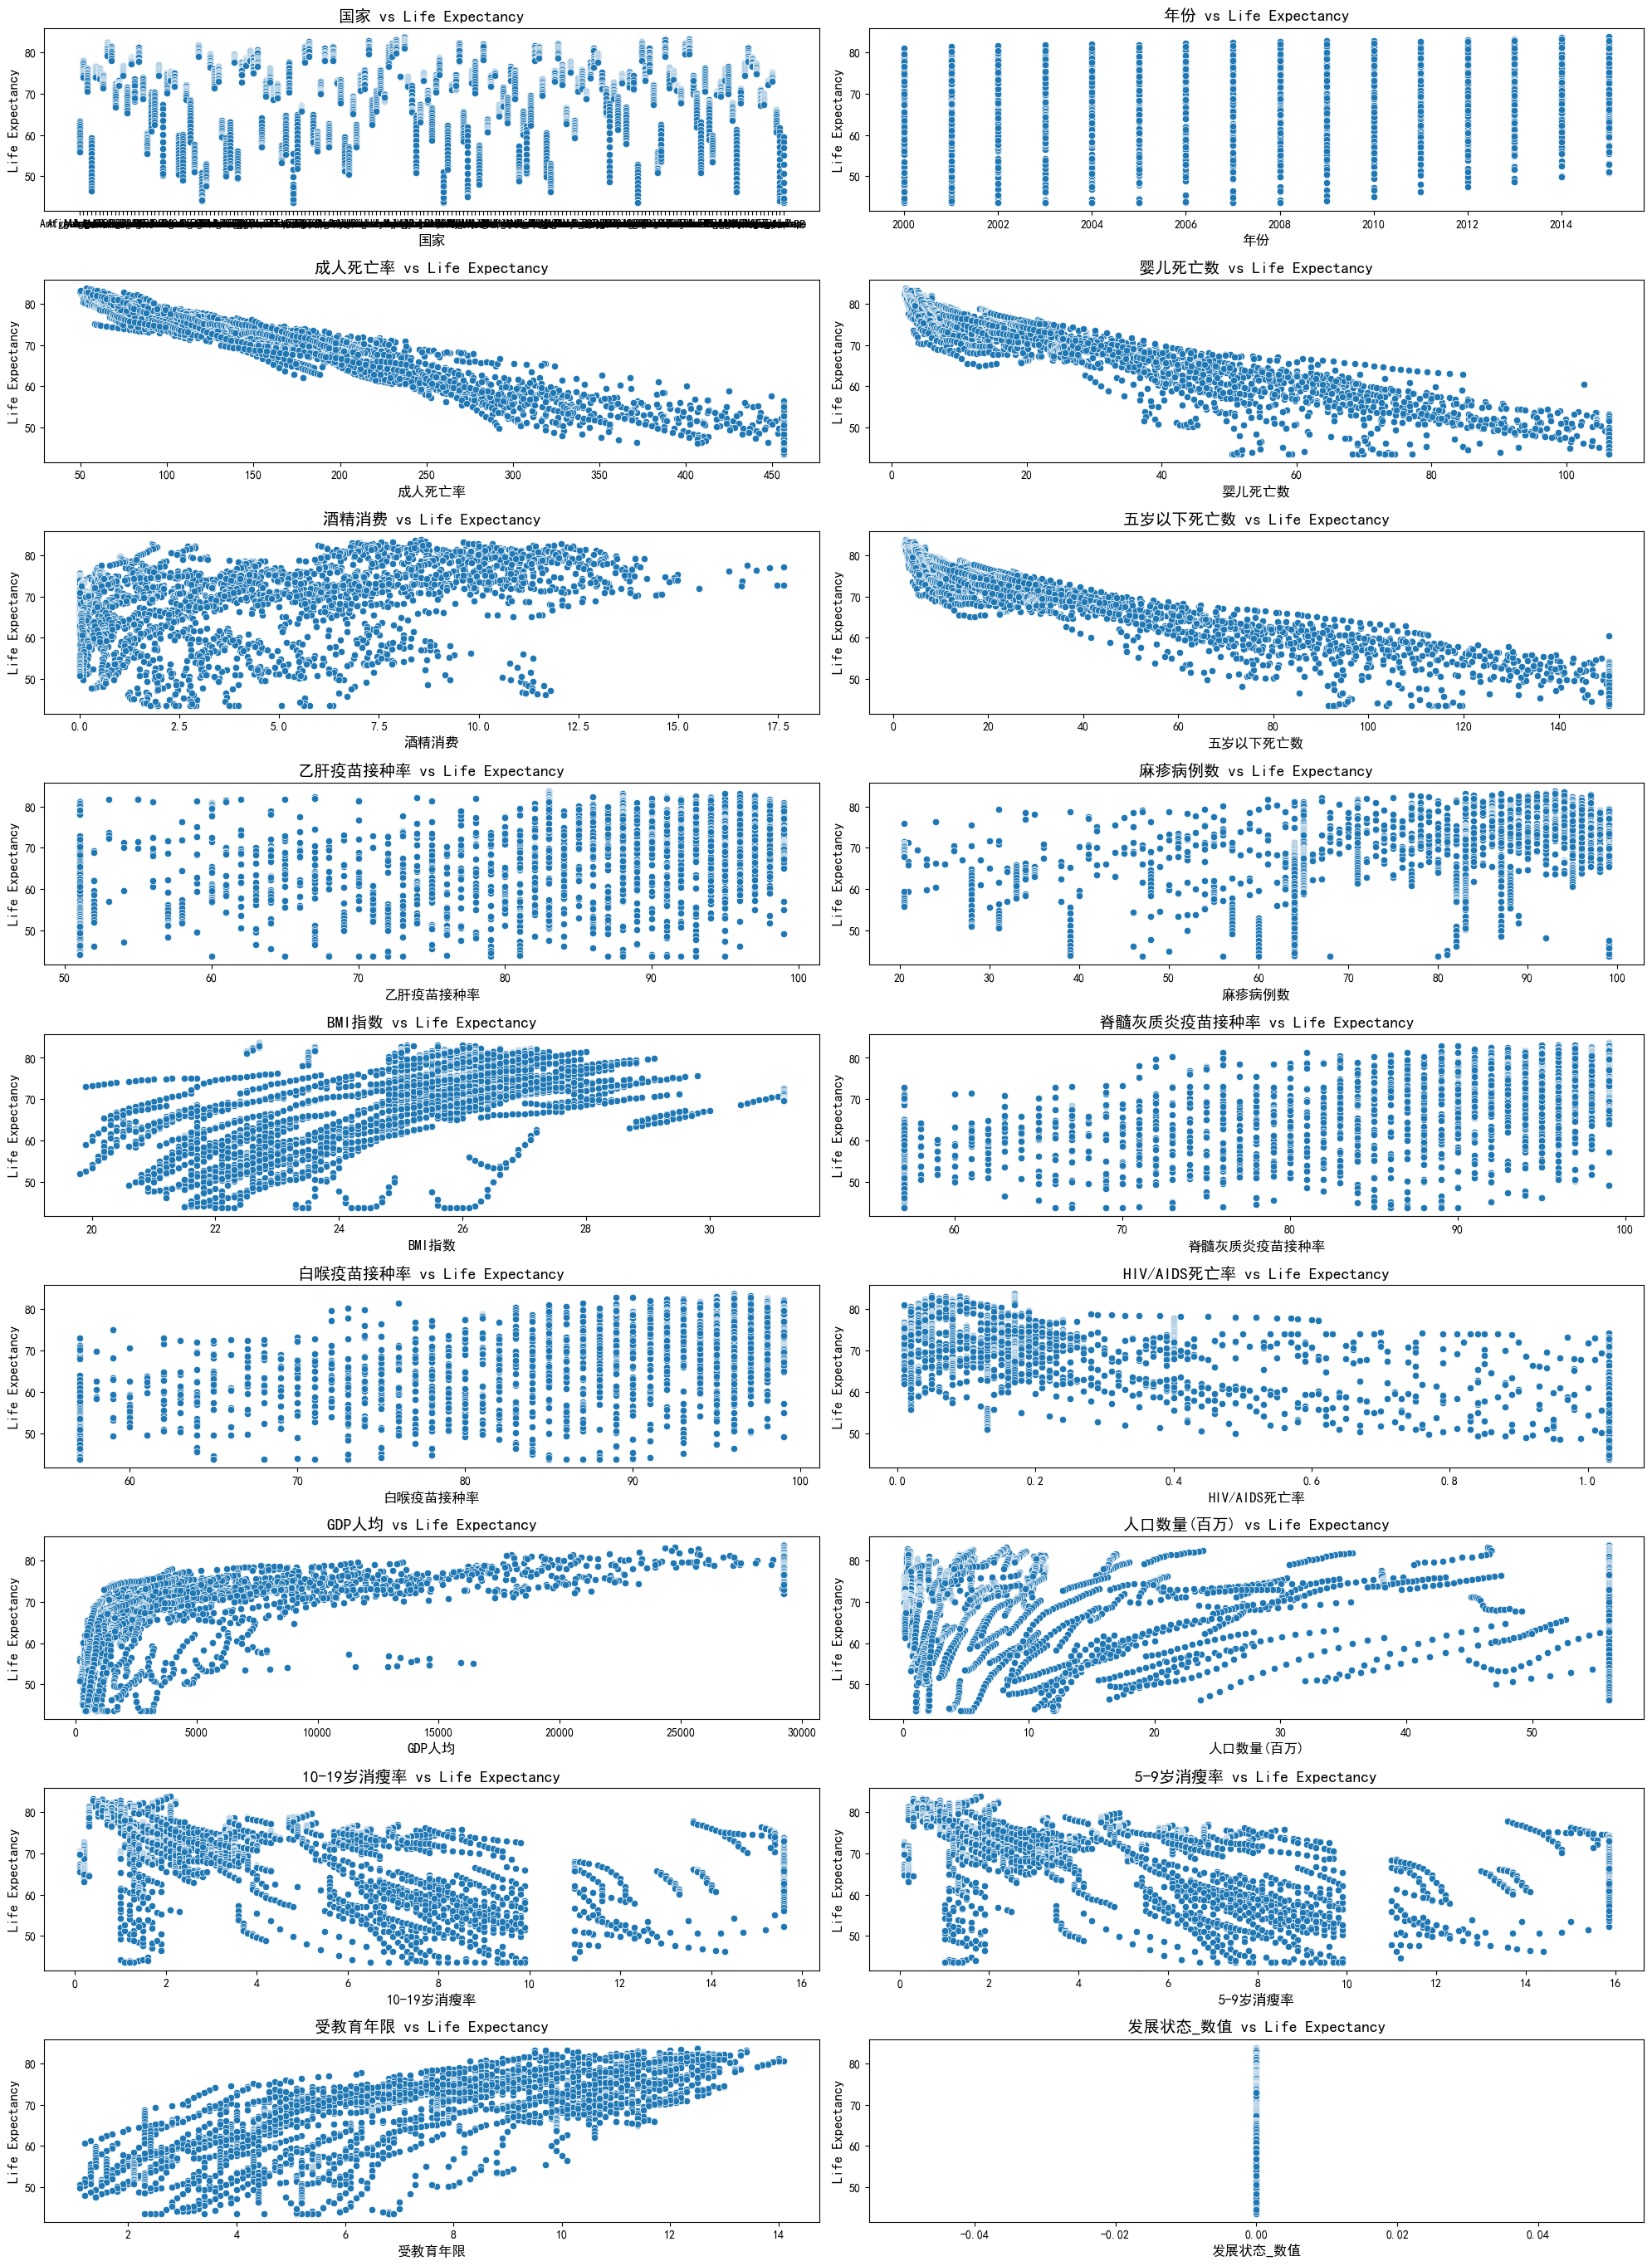

In [4]:
columns = [col for col in df.columns if col != '预期寿命']

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置图形大小
plt.figure(figsize=(20, 30))  # 调整图形大小，使图片更大

# 遍历每个特征列并绘制散点图
for i, col in enumerate(columns, 1):
    plt.subplot(len(columns) // 2 + 1, 2, i)  # 每行显示2个子图
    sns.scatterplot(x=df[col], y=df['预期寿命'])
    plt.title(f'{col} vs Life Expectancy', fontsize=14)  # 调整标题字体大小
    plt.xlabel(col, fontsize=12)  # 调整标签字体大小
    plt.ylabel('Life Expectancy', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# 计算每个特征与目标变量的相关系数
for column in df.columns:
    if column != '预期寿命' and column!= '国家':
        correlation = df[column].corr(df['预期寿命'])
        print(f'Correlation between {column} and 预期寿命: {correlation:.2f}')

Correlation between 年份 and 预期寿命: 0.17
Correlation between 成人死亡率 and 预期寿命: -0.96
Correlation between 婴儿死亡数 and 预期寿命: -0.92
Correlation between 酒精消费 and 预期寿命: 0.40
Correlation between 五岁以下死亡数 and 预期寿命: -0.93
Correlation between 乙肝疫苗接种率 and 预期寿命: 0.45
Correlation between 麻疹病例数 and 预期寿命: 0.49
Correlation between BMI指数 and 预期寿命: 0.60
Correlation between 脊髓灰质炎疫苗接种率 and 预期寿命: 0.65
Correlation between 白喉疫苗接种率 and 预期寿命: 0.64
Correlation between HIV/AIDS死亡率 and 预期寿命: -0.74
Correlation between GDP人均 and 预期寿命: 0.68
Correlation between 人口数量(百万) and 预期寿命: 0.04
Correlation between 10-19岁消瘦率 and 预期寿命: -0.51
Correlation between 5-9岁消瘦率 and 预期寿命: -0.50
Correlation between 受教育年限 and 预期寿命: 0.73
Correlation between 发展状态_数值 and 预期寿命: nan


d:\Develop\anaconda\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\Develop\anaconda\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


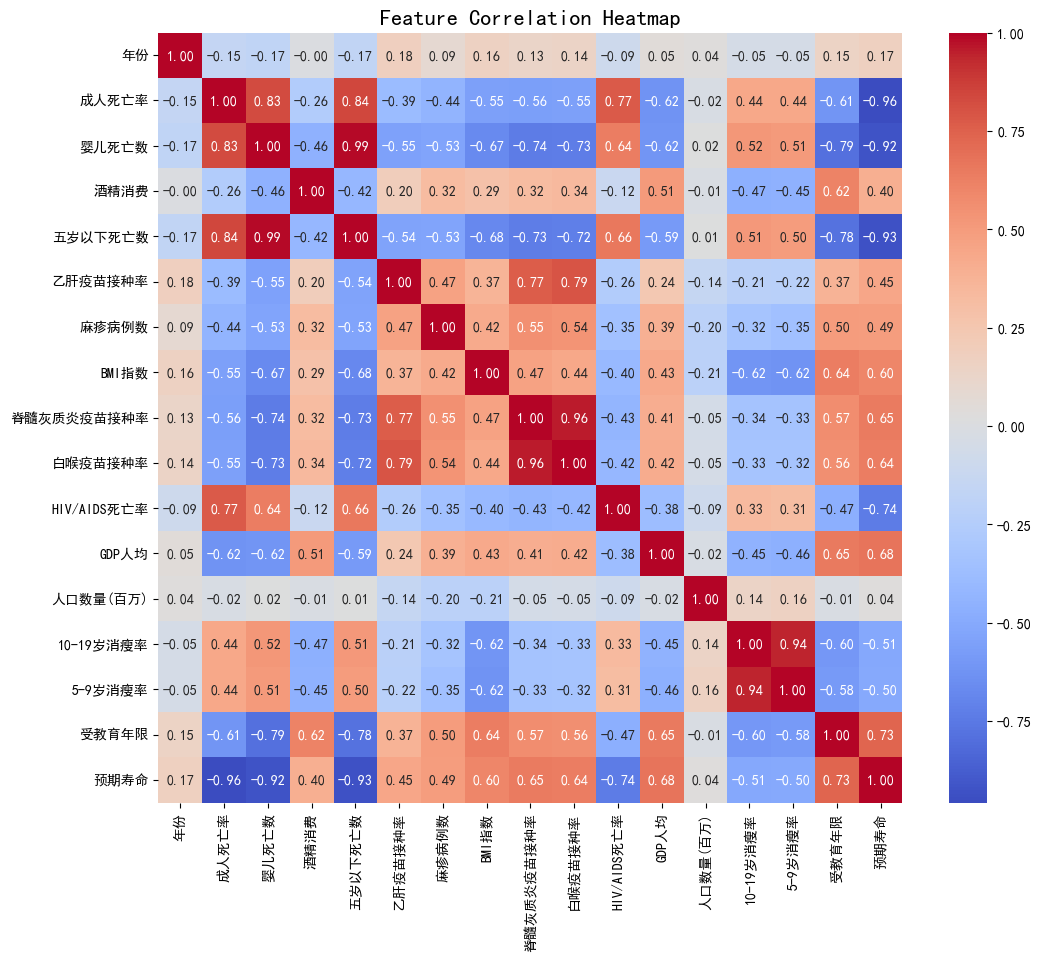

In [8]:
# 热力图
columns = [col for col in df.columns if col not in ['预期寿命', '国家', '发展状态_数值']]

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置图形大小
plt.figure(figsize=(12, 10))  # 调整图形大小，使热力图更清晰

# 绘制热力图
sns.heatmap(df[columns + ['预期寿命']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=16)  # 设置标题字体大小
plt.show()

In [7]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['预期寿命','国家'])
y = df['预期寿命']

model = RandomForestRegressor()
model.fit(X, y)

importance = model.feature_importances_
for col, imp in zip(X.columns, importance):
    print(f"{col}: {imp}")

年份: 0.0017078817749209664
成人死亡率: 0.2239990324884392
婴儿死亡数: 0.014257156252668404
酒精消费: 0.0020529741687671365
五岁以下死亡数: 0.7443871916711525
乙肝疫苗接种率: 0.0004726741862230765
麻疹病例数: 0.0007540099831867835
BMI指数: 0.0019503439899369729
脊髓灰质炎疫苗接种率: 0.0003664850273099135
白喉疫苗接种率: 0.00035112466838222735
HIV/AIDS死亡率: 0.0015180178693135257
GDP人均: 0.001877177050320055
人口数量(百万): 0.0034968682162679716
10-19岁消瘦率: 0.0007929451601631259
5-9岁消瘦率: 0.0009338238272768201
受教育年限: 0.0010822936656712907
发展状态_数值: 0.0
